# 1. 목적 정의

## 1) 분석목적

- Holiday 일때와 아닐때, 매출에 차이가 있는가?

# 2. 데이터 확인

데이터를 확인하는것은 실제로 데이터를 분석하기 시작하는 가장 첫 걸음입니다.

위에 정의된 분석목적을 보면서 더 고려해볼점은 없는지 부족한 데이터는 없는지 확인해야 합니다

## 1) 기본설명

- 데이터는 [여기](https://drive.google.com/open?id=1OgfjPHXN5qdwxNuf7wHhH_11veWukLym)를 클릭하면 직접 확인하실수 있습니다.<br>
로컬에서 실행하실분들은 이 파일을 직접 다운받으셔서 진행하세요

<br>

- [kaggle](https://www.kaggle.com/)이 출처임을 미리 밝힙니다.

<br>

- walmart의 매출데이터 중 일부입니다

## 2) 데이터 포맷 및 크기

- 포맷: CSV

<br>

- 크기: 약 12.2MB

<br>

- 데이터 사이즈:  421,570 rows × 5 columns

## 3) 데이터 항목(컬럼) 설명

- Store: 지점명
- Dept: 각 지점의 부서명
- Date: 날짜(7일단위)
- Weekly sales: 주별 매출
- IsHoliday: Holiday가 낀 주였는지를 알려주는 칼럼(Boolean)

# 3. 구글 드라이브의 데이터 불러오기(goolge api)

colaboratory는 local에 있는 파일(즉, 개인PC나 랩탑의 파일)을 그대로 불러올수 없으며,

그파일을 어딘가에 업로드 하여, 웹상에 올라와있는 파일의 url을 입력하던가,

구글 드라이브에 데이터 파일을 직접 업로드 한 후, 가져와야합니다.

구글드라이브를 이용하는 경우 구글의 파일공유 정책에 따라 로그인 및 권한 확인 절차가 필요하며,

해당사항은 아래와 같이 진행하면 됩니다.

파일을 업로드 하더라도, 무슨 파일을 불러올 지 모르기 때문에

file id를 넣어 지정해야 합니다. [여기](https://drive.google.com/open?id=1mdaxfa161UhvgNGKTtmC0gFS1EJpXDru) 를 참고하세요

(여기에선 위사항이 다 진행되어있으므로, 아래 코드를 실행하면 됩니다)

In [0]:
# for google autorization
from google.colab import auth
auth.authenticate_user()
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')


# download data to python
file_id = '1OgfjPHXN5qdwxNuf7wHhH_11veWukLym'           # 여기 이 줄의  ' ' 사이에 file id를 넣어야 합니다.
import io
from googleapiclient.http import MediaIoBaseDownload
request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  
  _, done = downloader.next_chunk()  
downloaded.seek(0)

print('complete')

complete


# 4. Import libraries

이제 무슨 파일을 읽어올건지는 알았으니 본격적으로 파일을 읽어와 봅시다.

제일 처음해야 할건 분석에 사용할 다양한 라이브러리들을 불러오는것입니다

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('All libraries are loaded')

All libraries are loaded


# 5. pandas로 데이터 불러오기

## 1) 데이터 파싱, 데이터 확인

pandas로 예제 데이터인 csv파일을 파싱하되, 옵션에 다음과 같이 해보세요.

<br>

- 파싱한 결과를 담을 변수명은 data 로 합니다.
- index를 default index가 아닌 데이터의 Date칼럼으로 변경합니다.
- data의 최상단 5행만 출력하시오

<br>

결과는 다음과 같이 나와야 합니다.

<br>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Store</th>
      <th>Dept</th>
      <th>Weekly_Sales</th>
      <th>IsHoliday</th>
    </tr>
    <tr>
      <th>Date</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2010-02-05</th>
      <td>1</td>
      <td>1</td>
      <td>24924.50</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2010-02-12</th>
      <td>1</td>
      <td>1</td>
      <td>46039.49</td>
      <td>True</td>
    </tr>
    <tr>
      <th>2010-02-19</th>
      <td>1</td>
      <td>1</td>
      <td>41595.55</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2010-02-26</th>
      <td>1</td>
      <td>1</td>
      <td>19403.54</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2010-03-05</th>
      <td>1</td>
      <td>1</td>
      <td>21827.90</td>
      <td>False</td>
    </tr>
  </tbody>
</table>

In [4]:
data = pd.read_csv(downloaded, index_col = 'Date', parse_dates = True)
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


## 2) 데이터 기본구조 파악하기

### 2.1) 칼럼명 확인하기

다음과 같은 과정을 수행하시오

<br>

- 위에서 선언한 data를 copy하여 df로 선언
- df에는 어떤 칼럼명들이 있는지 코드로 확인하시오

In [0]:
df = data.copy()
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday'], dtype='object')

### 2.2) 각 칼럼의 데이터타입 확인하기

In [0]:
df.dtypes

Store             int64
Dept              int64
Weekly_Sales    float64
IsHoliday          bool
dtype: object

### 2.3) index만 가져와서 확인하기

In [0]:
df.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=421570, freq=None)

여기서 index를 확인하였을때,

index의 데이터타입이 반드시 반드시 datetime64[ns] 가 되어있어야 합니다!

(object나 기타 다른 자료형이면 맨위에 csv파일을 파싱할때 코드를 수정하셔야 됩니다!)

### 2.3) 각 칼럼별 기술통계 확인(count, mean, std, min, 25%, 50%, 75%, max)

In [0]:
df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


### 2.4) 데이터 중 2010년도의 데이터만 가져와서 기술통계를 내시오.

In [0]:
df['2010'].describe()

,Store,Dept,Weekly_Sales
count,140679.000000,140679.000000,140679.000000
mean,22.151629,44.147428,16270.275737
std,12.776136,30.381291,23063.221134
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2238.330000
50%,22.000000,38.000000,7964.300000
75%,33.000000,72.000000,20587.205000
max,45.000000,99.000000,693099.360000


# 6. Null(=NaN) 확인

빈데이터는 얼마나 있을까요

다음의 과정대로 실행해보세요

- df를 카피하여 df2로 선언

- df2의 각 칼럼에서 빈값 갯수 확인

In [0]:
df2 = df.copy()
df2.isnull().sum()

# 7. WHY?? : 데이터분석을 할때 가장 중요한 질문

다시한번 요구조건을 봅시다.

<br>

- Holiday 일때와 아닐때, 매출에 차이가 있는가?

<br>

이것을 머리속에 새기면서 위에 기술통계로 최종 정리된 데이터를 다시한번 봅시다.

각 칼럼들의 기초통계량을 잘 살펴보세요.

어떤 문제점이 분석시 예상됩니까??

## 1) outlier

outlier는 어떻게 정의하고 어떻게 제거하실건가요?

outlier를 제거하지 않으면 어떤 문제점이 생길것으로 예상됩니까?

## 2) store 또는 dept 별로 매출에 심한 차이가 예상됨

각 지점별로, 부서별로 매출은 분명히 다를 것입니다.

일단 각 store 별 매출평균은 얼마일까요?

다음과 같은 방법에 따라 코드를 구현하여 확인하시오

자세한 코드의 사용법은 [여기](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)를 참고하시오

<br>

- df2를 copy하여 df3로 선언
- df3에 pivot_table 메써드를 이용하여, 값에 Weekly_Sales를, index는 Store로 하고, 평균낸 결과를 df3_pivot 변수로 선언
- df3_pivot의 상위 5줄만 출력하시오

<br>

결과는 다음과 같은 형태로 나와야 합니다

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Weekly_Sales</th>
    </tr>
    <tr>
      <th>Store</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>21710.543621</td>
    </tr>
    <tr>
      <th>2</th>
      <td>26898.070031</td>
    </tr>
    <tr>
      <th>3</th>
      <td>6373.033983</td>
    </tr>
    <tr>
      <th>4</th>
      <td>29161.210415</td>
    </tr>
    <tr>
      <th>5</th>
      <td>5053.415813</td>
    </tr>
  </tbody>
</table>



In [5]:
df3 = df2.copy()
df3_pivot = df3.pivot_table(values = ['Weekly_Sales'], index = ['Store'], aggfunc = np.mean)
df3_pivot.head()

NameError: ignored

확인결과 어떻습니까?

store별로 매출 평균에 차이가 있나요? 평가해보세요.

만약 차이가 있다고 판단되는 경우, 어떻게 처리해야 하겠습니까?

## 3) 기타등등...

이거 말고도 위데이터에서 고려해봐야 할것은 얼마든지 있습니다.

이렇게 데이터를 분석하기 전에 데이터를 보고 결정해야 되는것들이 많이 있습니다.

문제를 있는대로 다 생각해보고, 어떻게 처리하면 좋을지도 고민해보세요.

## 4) 일단 예시로 모든 데이터에서 Weekly_sales 기준으로 너무 낮은 매출과 너무 높은 매출을 날려보겠습니다.

일단 칼럼을 하나 더 추가하고, 거기에 Weekly_sales의 값을 z값으로 변환해보겠습니다

scipy 라이브러리 의 stats라는 메써드에서 이를 지원하고 있습니다.

상세한 사용방법은 [여기](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)를 참고하면서

아래 과정에 따라 코드를 작성하시오

<br>

- scipy 의 stats를 임포트 하시오

- df3를 카피하여 df4로 선언하시오

- df4의 맨마지막칼럼에 z_sales라는 칼럼을 추가하고, 해당칼럼에 df4의 Weekly_sales 칼럼의 모든 값들을 표준화(z) 한 값을 넣으시오

- df4에서 상단 5행만 출력하시오

<br>

다음과 같은 결과가 나와야 합니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Store</th>
      <th>Dept</th>
      <th>Weekly_Sales</th>
      <th>IsHoliday</th>
      <th>z_sales</th>
    </tr>
    <tr>
      <th>Date</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2010-02-05</th>
      <td>1</td>
      <td>1</td>
      <td>24924.50</td>
      <td>False</td>
      <td>0.393782</td>
    </tr>
    <tr>
      <th>2010-02-12</th>
      <td>1</td>
      <td>1</td>
      <td>46039.49</td>
      <td>True</td>
      <td>1.323501</td>
    </tr>
    <tr>
      <th>2010-02-19</th>
      <td>1</td>
      <td>1</td>
      <td>41595.55</td>
      <td>False</td>
      <td>1.127829</td>
    </tr>
    <tr>
      <th>2010-02-26</th>
      <td>1</td>
      <td>1</td>
      <td>19403.54</td>
      <td>False</td>
      <td>0.150687</td>
    </tr>
    <tr>
      <th>2010-03-05</th>
      <td>1</td>
      <td>1</td>
      <td>21827.90</td>
      <td>False</td>
      <td>0.257435</td>
    </tr>
  </tbody>
</table>


In [0]:
from scipy import stats
df4 = df3.copy()
df4['z_sales'] = stats.zscore(df4['Weekly_Sales'])
df4.head()

,Store,Dept,Weekly_Sales,IsHoliday,z_sales
Date,,,,,
2010-02-05,1,1,24924.50,False,0.393782
2010-02-12,1,1,46039.49,True,1.323501
2010-02-19,1,1,41595.55,False,1.127829
2010-02-26,1,1,19403.54,False,0.150687
2010-03-05,1,1,21827.90,False,0.257435


위의 z_sales 칼럼의 z값을 이용하여 전체 데이터 중 상하위 극단값 2.5%씩을 각각 버리도록 하겠습니다

기초시간에 배웠던 표준화(z)의 개념을 생각하면서 아래에 코드를 작성하시오

<br>

- df4를 카피하여 df5로 선언
- df5의 z_sales 칼럼의 값이 특정값(어떤값이 되어야 할지는 직접 생각해보세요) 사이에 있는 데이터만 선택
- 해당 처리가 된 df5에서 최상단 5행만 출력하시오

In [0]:
df5 = df4.copy()
df5 = df5[df5['z_sales'].between(-2, 2)]
df5.head()

,Store,Dept,Weekly_Sales,IsHoliday,z_sales
Date,,,,,
2010-02-05,1,1,24924.50,False,0.393782
2010-02-12,1,1,46039.49,True,1.323501
2010-02-19,1,1,41595.55,False,1.127829
2010-02-26,1,1,19403.54,False,0.150687
2010-03-05,1,1,21827.90,False,0.257435


df5의 기술통계를 출력하시오.

결과는 다음과 같이 나옵니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Store</th>
      <th>Dept</th>
      <th>Weekly_Sales</th>
      <th>z_sales</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>400657.000000</td>
      <td>400657.000000</td>
      <td>400657.000000</td>
      <td>400657.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>22.402838</td>
      <td>43.202205</td>
      <td>12121.841978</td>
      <td>-0.169935</td>
    </tr>
    <tr>
      <th>std</th>
      <td>12.778545</td>
      <td>29.915770</td>
      <td>13783.220700</td>
      <td>0.606892</td>
    </tr>
    <tr>
      <th>min</th>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>-4988.940000</td>
      <td>-0.923343</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>11.000000</td>
      <td>18.000000</td>
      <td>1885.710000</td>
      <td>-0.620644</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>22.000000</td>
      <td>36.000000</td>
      <td>6871.920000</td>
      <td>-0.401095</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>33.000000</td>
      <td>71.000000</td>
      <td>17459.880000</td>
      <td>0.065106</td>
    </tr>
    <tr>
      <th>max</th>
      <td>45.000000</td>
      <td>99.000000</td>
      <td>61403.180000</td>
      <td>1.999983</td>
    </tr>
  </tbody>
</table>

In [0]:
df5.describe()

,Store,Dept,Weekly_Sales,z_sales
count,400657.000000,400657.000000,400657.000000,400657.000000
mean,22.402838,43.202205,12121.841978,-0.169935
std,12.778545,29.915770,13783.220700,0.606892
min,1.000000,1.000000,-4988.940000,-0.923343
25%,11.000000,18.000000,1885.710000,-0.620644
50%,22.000000,36.000000,6871.920000,-0.401095
75%,33.000000,71.000000,17459.880000,0.065106
max,45.000000,99.000000,61403.180000,1.999983


약 2만건의 record가 제외되었습니다.

이전과 비교하여 충분히 outlier가 제거되었다고 할수있는지 확인하세요.

만약 충분하다고 판단하지 않는 경우 어떠한 방법을 더 생각해볼수 있는지 고려해보세요

# 8. 이제 드디어 알고리즘을 고민의 시간!

위와 같이 충분히 데이터를 잘 정리하신후, 다시 분석 목적을 생각해봅시다

<br>

- Holiday 일때와 아닐때, 매출에 차이가 있는가?

<br>

알고리즘은 아래서 다시 생각해 보고, 일단 두 조건일때의 매출 평균을 막대그래프로 비교해보겠습니다.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


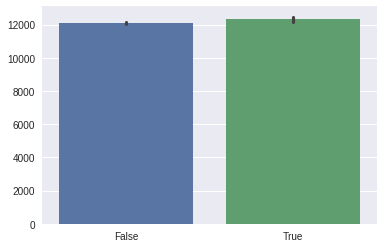

In [0]:
# 아래 코드는 seaborn 라이브러리를 이용하여 시각화를 하는 코드입니다
# 여러분들은 아직 시각화를 배우지 않았으니, 아래 코드는 그냥 따라 실행해보세요
sns.barplot(x = df5['IsHoliday'].values, y = df5['Weekly_Sales'].values)

pandas의 groupby 메써드를 이용하여 df5 데이터프레임에서 holiday가 True일때와 False일때 각각의 Weekly_sales 평균을 구하시오

In [0]:
df5.groupby(df5['IsHoliday'])['Weekly_Sales'].mean()

IsHoliday
False    12107.492313
True     12312.450917
Name: Weekly_Sales, dtype: float64

pandas의 groupby 메써드를 이용하여 df5 데이터프레임에서 holiday가 True일때와 False일때 각각의 Weekly_sales 표준편차를 구하시오

In [0]:
df5.groupby(df5['IsHoliday'])['Weekly_Sales'].std()

IsHoliday
False    13780.347040
True     13820.168197
Name: Weekly_Sales, dtype: float64

이정도면 표준편차(분산)은 거의 같다고 봐야겠네요. 40차이밖에 안남.

이거 왜하죠?? 바로 떠올라야 합니다.

<b>아... 등분산 검정!!!!!</b>

계산결과를 보면 holiday일때랑 아닐때 현재 샘플데이터에서의 평균 매출차이는 약 200정도 발생하고있습니다.

(당연히 전처리를 어떻게 했느냐에 따라 이수치는 달라집니다)

통계적으로 이수치가 실제 차이나는것인지를 검증하려면???.

두 조건의 비교이군요. 어떤 알고리즘을 사용해야 하나요?

단, 데이터는 다음과 같다고 가정합니다.

<br>

1. holiday일때와 아닐때 두 매출은 서로의 매출에 영향을 미치지 않는다(즉, 독립이다)

2. 두 조건 매출의 모집단은 정상분포라고 가정한다.

3. 두 조건의 분산이 통계적으로 동일하다고 가정한다.(위에서 이미 확인했습니다.)

<br>

<b>해당 알고리즘은 기초시간에 배웠으며, 0가설 검정을 통해 해결합니다.</b>

이역시 scipy의 stats 에서 지원하고있습니다. 찾아서 통계적 결과를 내 보세요.

In [0]:
hol = df5[df5['IsHoliday'] == True]['Weekly_Sales']
non_hol = df5[df5['IsHoliday'] == False]['Weekly_Sales']


stats.ttest_ind(hol, non_hol)

Ttest_indResult(statistic=2.4017663531750646, pvalue=0.016316578445715872)

# 9. 결론

자, 위의 과정까지 모두 하셨으면 결론을 내리실수 있습니다.

어떤 결론이 나왔나요? 결론을 report 해보세요